In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from PIL import Image, ImageFilter
%matplotlib inline
import pywt
from matplotlib.image import imread
from math import log10, sqrt
import cv2
import numpy as np
from PIL import Image
import math
from skimage import img_as_float
from skimage.measure import compare_mse as mse

In [2]:
lst_img = os.listdir("C:/Users/cyberchef/OneDrive/Desktop/Seminar Image Enhancement/Implementation/data_2") # returns list 

In [3]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def rmsdiff(im1, im2):
    """Calculates the root mean square error (RSME) between two images"""
    return math.sqrt(mse(img_as_float(im1), img_as_float(im2)))

def ssim(img1, img2):
    C1 = (0.01 * 255)**2
    C2 = (0.03 * 255)**2

    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    kernel = cv2.getGaussianKernel(11, 1.5)
    window = np.outer(kernel, kernel.transpose())

    mu1 = cv2.filter2D(img1, -1, window)[5:-5, 5:-5]  # valid
    mu2 = cv2.filter2D(img2, -1, window)[5:-5, 5:-5]
    mu1_sq = mu1**2
    mu2_sq = mu2**2
    mu1_mu2 = mu1 * mu2
    sigma1_sq = cv2.filter2D(img1**2, -1, window)[5:-5, 5:-5] - mu1_sq
    sigma2_sq = cv2.filter2D(img2**2, -1, window)[5:-5, 5:-5] - mu2_sq
    sigma12 = cv2.filter2D(img1 * img2, -1, window)[5:-5, 5:-5] - mu1_mu2

    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / ((mu1_sq + mu2_sq + C1) *
                                                            (sigma1_sq + sigma2_sq + C2))
    return ssim_map.mean()

PSNR_lst=[[]]
RMSE_lst=[[]]
SSIM_lst=[[]]

total_images=len(lst_img)

def filters(image):
    
# def median(image):
    median_blur = cv2.medianBlur(image,5)
    median_psnr_value= PSNR(image, median_blur)
    median_rmse_value=rmsdiff(median_blur,image)
    median_ssim_value=ssim(median_blur,image)

# def meanf(image):
    mean_blur = cv2.blur(image, (5,5))
    mean_psnr_value= PSNR(image, mean_blur)
    mean_rmse_value=rmsdiff(mean_blur,image)
    mean_ssim_value=ssim(mean_blur,image)
    
# def gaussian(image):
    gaussian_blur = cv2.GaussianBlur(image,(5,5),0)
    gaussian_psnr_value= PSNR(image, gaussian_blur)
    gaussian_rmse_value=rmsdiff(gaussian_blur,image)
    gaussian_ssim_value=ssim(gaussian_blur,image)
    
# def bilateral(image):
    bilateral_blur = cv2.bilateralFilter(image,23,51,51)
    bilateral_psnr_value= PSNR(image, bilateral_blur)
    bilateral_rmse_value=rmsdiff(bilateral_blur,image)
    bilateral_ssim_value=ssim(bilateral_blur,image)

    PSNR_lst.append([median_psnr_value,mean_psnr_value,gaussian_psnr_value,bilateral_psnr_value])
    RMSE_lst.append([median_rmse_value,mean_rmse_value,gaussian_rmse_value,bilateral_rmse_value])
    SSIM_lst.append([median_ssim_value,mean_ssim_value,gaussian_ssim_value,bilateral_ssim_value])
    
    
def avg(name,x):
    s=0
    for i in range(1,total_images):
        s+=name[i][x]
    s=s/total_images
    return s


def main():
    for i in range(0,total_images):
        if i<=9:
            path="C:/Users/cyberchef/OneDrive/Desktop/Seminar Image Enhancement/Implementation/data_2/CT00000{}.jpg".format(str(i))
        else:
            path="C:/Users/cyberchef/OneDrive/Desktop/Seminar Image Enhancement/Implementation/data_2/CT0000{}.jpg".format(str(i))
        image=cv2.imread(path)
        filters(image)
    
if __name__ == "__main__":
    main()
    
    median_filter_values=[avg(PSNR_lst,0),avg(RMSE_lst,0),avg(SSIM_lst,0)]
    mean_filter_values=[avg(PSNR_lst,1),avg(RMSE_lst,1),avg(SSIM_lst,1)]
    gaussian_filter_values=[avg(PSNR_lst,2),avg(RMSE_lst,2),avg(SSIM_lst,2)]
    bilateral_filter_values=[avg(PSNR_lst,3),avg(RMSE_lst,3),avg(SSIM_lst,3)]
    print("**")

    print("median_filter PSNR Average : ",median_filter_values[0])
    print("median_filter RMSE Average : ",median_filter_values[1])
    print("median_filter SSIM Average : ",median_filter_values[2])

    print("**")

    print("mean_filter PSNR Average : ",mean_filter_values[0])
    print("mean_filter RMSE Average : ",mean_filter_values[1])
    print("mean_filter SSIM Average : ",mean_filter_values[2])

    print("**") 

    print("gaussian_filter PSNR Average : ",gaussian_filter_values[0])
    print("gaussian_filter RMSE Average : ",gaussian_filter_values[1])
    print("gaussian_filter SSIM Average : ",gaussian_filter_values[2])

    print("**")

    print("bilateral_filter PSNR Average : ",bilateral_filter_values[0])
    print("bilateral_filter RMSE Average : ",bilateral_filter_values[1])
    print("bilateral_filter SSIM Average : ",bilateral_filter_values[2])

    print("**")

    print('DONE') 

<ipython-input-3-02389fdcf0ed>:12: UserWarning: DEPRECATED: skimage.measure.compare_mse has been moved to skimage.metrics.mean_squared_error. It will be removed from skimage.measure in version 0.18.
  return math.sqrt(mse(img_as_float(im1), img_as_float(im2)))


**
median_filter PSNR Average :  61.54734826957182
median_filter RMSE Average :  0.0007316877104993499
median_filter SSIM Average :  0.9794757490974427
**
mean_filter PSNR Average :  54.62997919181345
mean_filter RMSE Average :  0.0016045739125709543
mean_filter SSIM Average :  0.9779588189998352
**
gaussian_filter PSNR Average :  56.96172867327158
gaussian_filter RMSE Average :  0.0012193592774289751
gaussian_filter SSIM Average :  0.9787709433131019
**
bilateral_filter PSNR Average :  48.71902910254634
bilateral_filter RMSE Average :  0.0032169768874227176
bilateral_filter SSIM Average :  0.9754710454296851
**
DONE


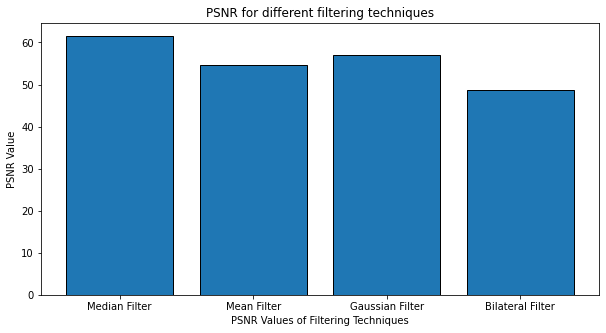

In [7]:
data = {'Median Filter':median_filter_values[0], 'Mean Filter':mean_filter_values[0], 'Gaussian Filter':gaussian_filter_values[0],'Bilateral Filter':bilateral_filter_values[0]}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, edgecolor ='black')
 
plt.xlabel("PSNR Values of Filtering Techniques")
plt.ylabel("PSNR Value")
plt.title("PSNR for different filtering techniques")
plt.show()

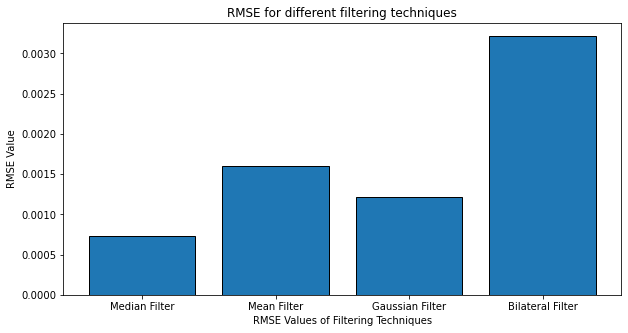

In [8]:
data = {'Median Filter':median_filter_values[1], 'Mean Filter':mean_filter_values[1], 'Gaussian Filter':gaussian_filter_values[1],'Bilateral Filter':bilateral_filter_values[1]}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, edgecolor ='black')
 
plt.xlabel("RMSE Values of Filtering Techniques")
plt.ylabel("RMSE Value")
plt.title("RMSE for different filtering techniques")
plt.show()
  

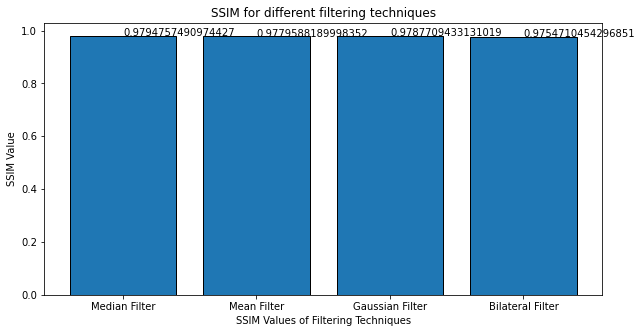

In [31]:
data = {'Median Filter':median_filter_values[2], 'Mean Filter':mean_filter_values[2], 'Gaussian Filter':gaussian_filter_values[2],'Bilateral Filter':bilateral_filter_values[2]}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, edgecolor ='black')
for i in range(4):
    plt.text(i,values[i],values[i])
plt.xlabel("SSIM Values of Filtering Techniques")
plt.ylabel("SSIM Value")
plt.title("SSIM for different filtering techniques")

plt.show()